In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import spectral_connectivity

In [3]:
SAMPLING_FREQUENCY = 125 # samples / sec

In [4]:
linear_track_position = pd.read_csv(
    '../Raw-Data/20190827_Jaq_08_lineartrackDeepCut_resnet50_lineartrackAug28shuffle1_1030000.csv',
    low_memory=False, header=[1, 2])
linear_track_position = linear_track_position.drop(columns=linear_track_position.loc[:, pd.IndexSlice[:, 'likelihood']].columns)
linear_track_position = linear_track_position.drop(columns=('bodyparts', 'coords'))
linear_track_position.head(5)

nose                  tail               forepawL             \
            x          y          x          y           x          y   
0  289.252597  55.031695  81.623481  63.639024  271.136374  58.621580   
1  288.928013  55.037228  81.562356  63.637609  270.776045  58.417569   
2  290.515401  55.416431  81.631704  63.924578  170.599767  42.402530   
3  290.531078  56.801223  81.650809  63.305836  187.549289  84.285131   
4  292.167135  57.840600  80.969105  62.929203  169.975791  47.036995   

     forepawR               hindpawL               hindpawR             
            x          y           x          y           x          y  
0  179.566711  28.768911   -0.311772  38.271837  110.225670  47.033771  
1  179.542516  28.773679   -0.311691  38.276016  110.210524  46.817917  
2  179.667591  29.513460   -0.379473  38.258168  110.317898  47.213404  
3  178.659811  33.538887  163.093242  84.517890  158.663220  35.447705  
4  181.633136  34.664087  156.137152  82.732919  285.106403  60.841830

In [5]:
linear_track_position.columns

MultiIndex([(    'nose', 'x'),
            (    'nose', 'y'),
            (    'tail', 'x'),
            (    'tail', 'y'),
            ('forepawL', 'x'),
            ('forepawL', 'y'),
            ('forepawR', 'x'),
            ('forepawR', 'y'),
            ('hindpawL', 'x'),
            ('hindpawL', 'y'),
            ('hindpawR', 'x'),
            ('hindpawR', 'y')],
           )

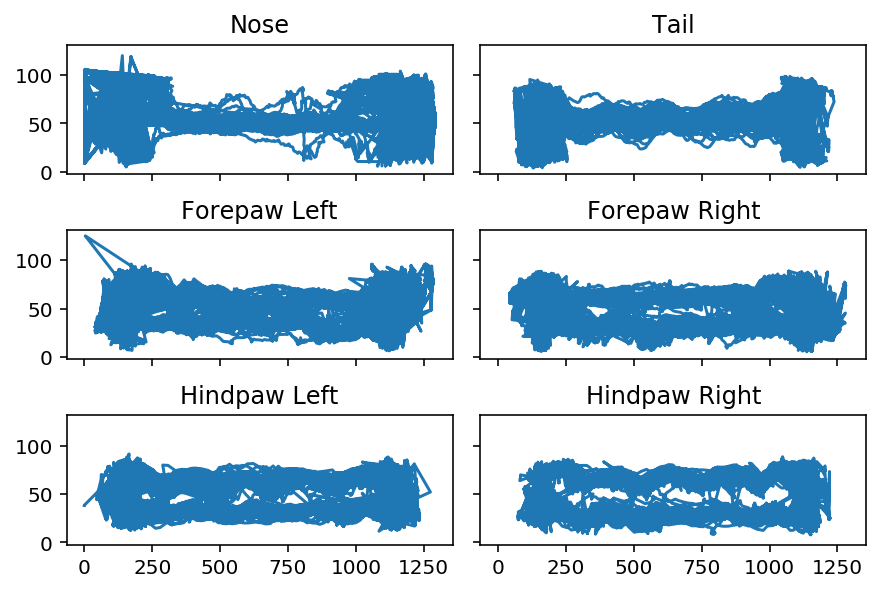

In [6]:
fig, axes = plt.subplots(3, 2, constrained_layout=True, sharex=True, sharey=True)

axes[0, 0].plot(linear_track_position.loc[:, ( 'nose', 'x')], linear_track_position.loc[:, ( 'nose', 'y')])
axes[0, 0].set_title('Nose')
axes[0, 1].plot(linear_track_position.loc[:, ( 'tail', 'x')], linear_track_position.loc[:, ( 'tail', 'y')])
axes[0, 1].set_title('Tail')

axes[1, 0].plot(linear_track_position.loc[:, ( 'forepawL', 'x')], linear_track_position.loc[:, ( 'forepawL', 'y')])
axes[1, 0].set_title('Forepaw Left')
axes[1, 1].plot(linear_track_position.loc[:, ( 'forepawR', 'x')], linear_track_position.loc[:, ( 'forepawR', 'y')])
axes[1, 1].set_title('Forepaw Right')

axes[2, 0].plot(linear_track_position.loc[:, ( 'hindpawL', 'x')], linear_track_position.loc[:, ( 'hindpawL', 'y')])
axes[2, 0].set_title('Hindpaw Left')
axes[2, 1].plot(linear_track_position.loc[:, ( 'hindpawR', 'x')], linear_track_position.loc[:, ( 'hindpawR', 'y')])
axes[2, 1].set_title('Hindpaw Right');

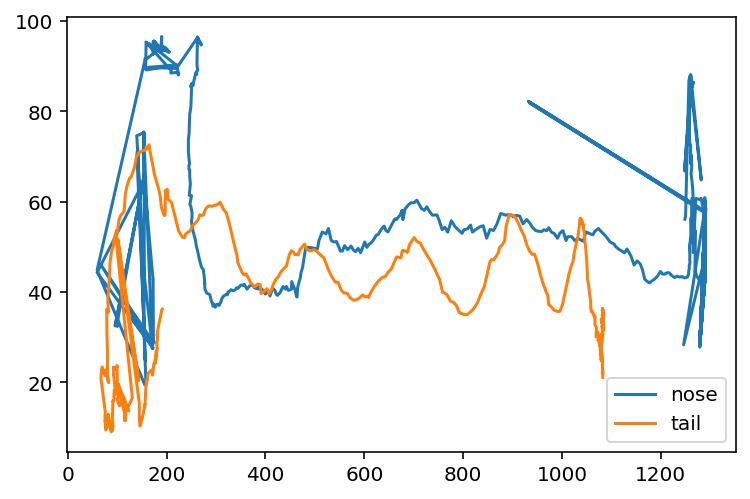

In [7]:
t_ind = slice(SAMPLING_FREQUENCY * 20, SAMPLING_FREQUENCY * 30)

plt.plot(linear_track_position.loc[t_ind, ( 'nose', 'x')], linear_track_position.loc[t_ind, ( 'nose', 'y')],
         label='nose')
plt.plot(linear_track_position.loc[t_ind, ( 'tail', 'x')], linear_track_position.loc[t_ind, ( 'tail', 'y')],
         label='tail')
plt.legend()

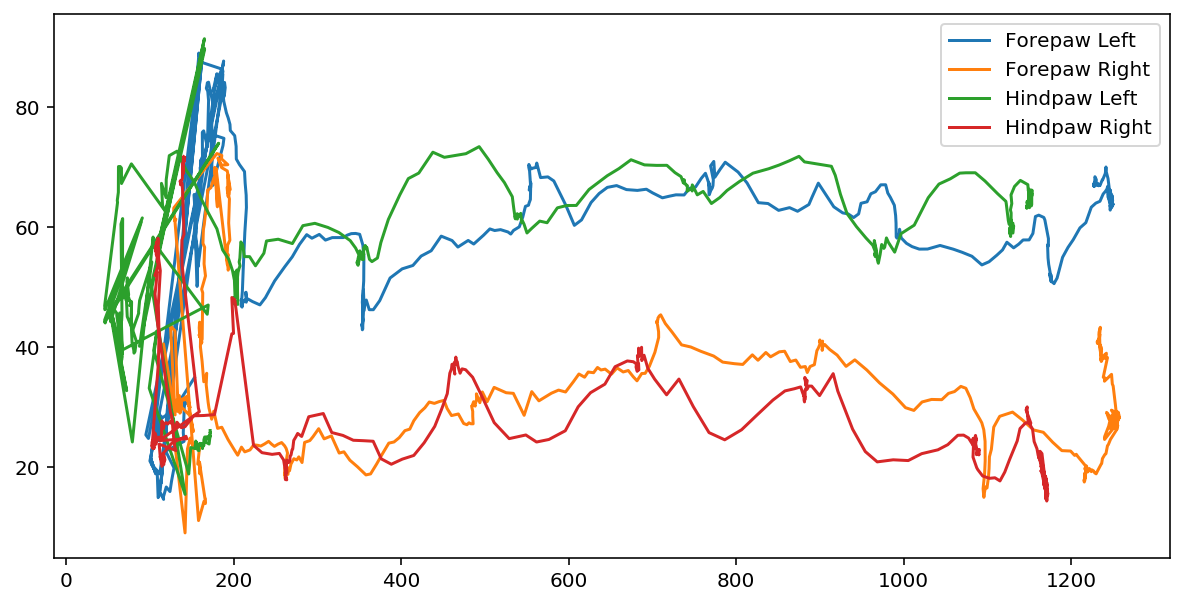

In [8]:
t_ind = slice(SAMPLING_FREQUENCY * 20, SAMPLING_FREQUENCY * 30)

plt.figure(figsize=(10, 5))
plt.plot(linear_track_position.loc[t_ind, ( 'forepawL', 'x')], linear_track_position.loc[t_ind, ( 'forepawL', 'y')],
         label='Forepaw Left')
plt.plot(linear_track_position.loc[t_ind, ( 'forepawR', 'x')], linear_track_position.loc[t_ind, ( 'forepawR', 'y')],
         label='Forepaw Right')

plt.plot(linear_track_position.loc[t_ind, ( 'hindpawL', 'x')], linear_track_position.loc[t_ind, ( 'hindpawL', 'y')],
         label='Hindpaw Left')
plt.plot(linear_track_position.loc[t_ind, ( 'hindpawR', 'x')], linear_track_position.loc[t_ind, ( 'hindpawR', 'y')],
         label='Hindpaw Right')
plt.legend()

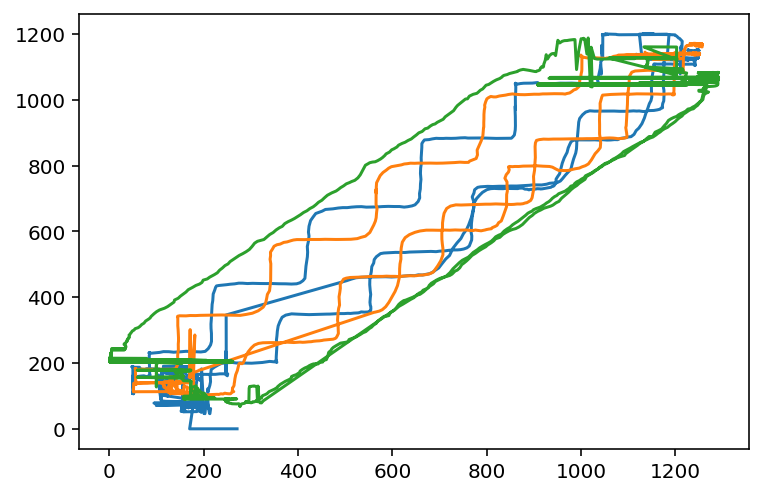

In [9]:
t_ind = slice(SAMPLING_FREQUENCY * 0, SAMPLING_FREQUENCY * 30)

plt.plot(linear_track_position.loc[t_ind, ( 'forepawL', 'x')], linear_track_position.loc[t_ind, ( 'hindpawL', 'x')])
plt.plot(linear_track_position.loc[t_ind, ( 'forepawR', 'x')], linear_track_position.loc[t_ind, ( 'hindpawR', 'x')])
plt.plot(linear_track_position.loc[t_ind, ( 'nose', 'x')], linear_track_position.loc[t_ind, ( 'tail', 'x')])

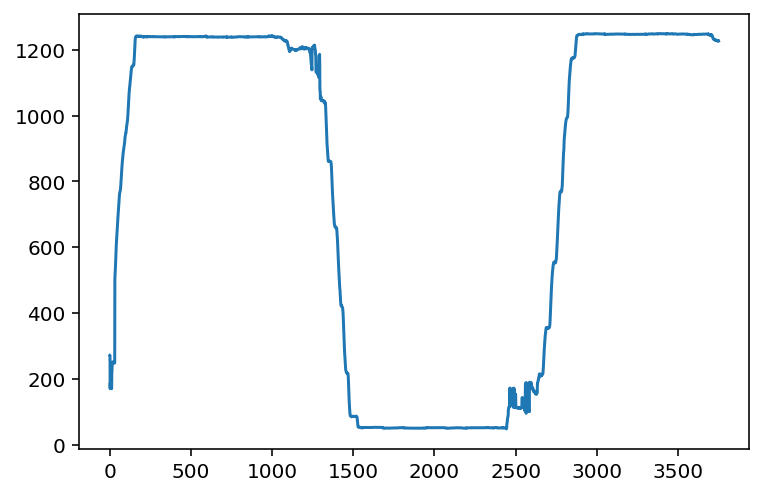

In [10]:
plt.plot(linear_track_position.loc[t_ind, ( 'forepawL', 'x')])

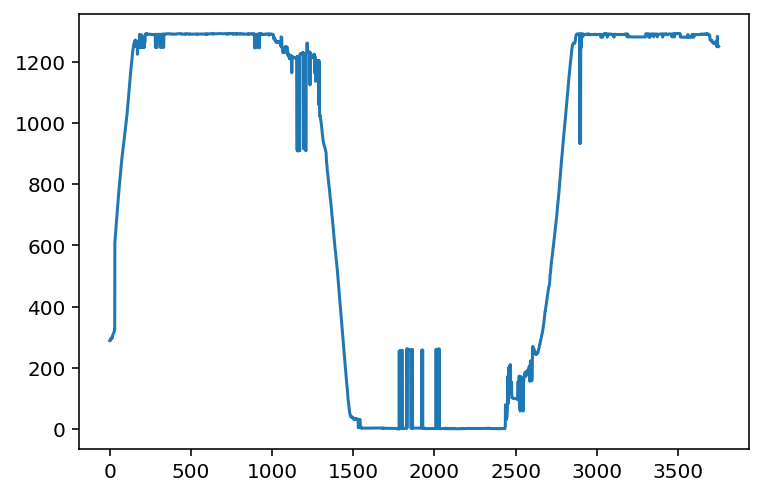

In [11]:
plt.plot(linear_track_position.loc[t_ind, ( 'nose', 'x')])

In [12]:
multitaper = spectral_connectivity.Multitaper(
    linear_track_position.values,
    sampling_frequency=SAMPLING_FREQUENCY,
    time_window_duration=0.500,
    time_window_step=0.500,
    time_halfbandwidth_product=1)
print(f'frequency resolution = {multitaper.frequency_resolution} Hz')

frequency resolution = 2.0 Hz


In [13]:
connectivity = spectral_connectivity.Connectivity.from_multitaper(multitaper)

dimension_names = ['time', 'frequency', 'position']
data_vars = {'power': (dimension_names, connectivity.power())}
coordinates = {
    'time': connectivity.time + np.diff(connectivity.time)[0] / 2,
    'frequency': connectivity.frequencies + np.diff(connectivity.frequencies)[0] / 2,
    'position': linear_track_position.columns
}

power = xr.Dataset(data_vars, coords=coordinates)
power

<xarray.Dataset>
Dimensions:           (frequency: 32, position: 12, time: 1815)
Coordinates:
  * time              (time) float64 0.248 0.744 1.24 ... 899.0 899.5 900.0
  * frequency         (frequency) float64 0.9766 2.93 4.883 ... 59.57 61.52
  * position          (position) MultiIndex
  - position_level_0  (position) object 'nose' 'nose' ... 'hindpawR' 'hindpawR'
  - position_level_1  (position) object 'x' 'y' 'x' 'y' 'x' ... 'x' 'y' 'x' 'y'
Data variables:
    power             (time, frequency, position) float64 31.2 ... 0.001736

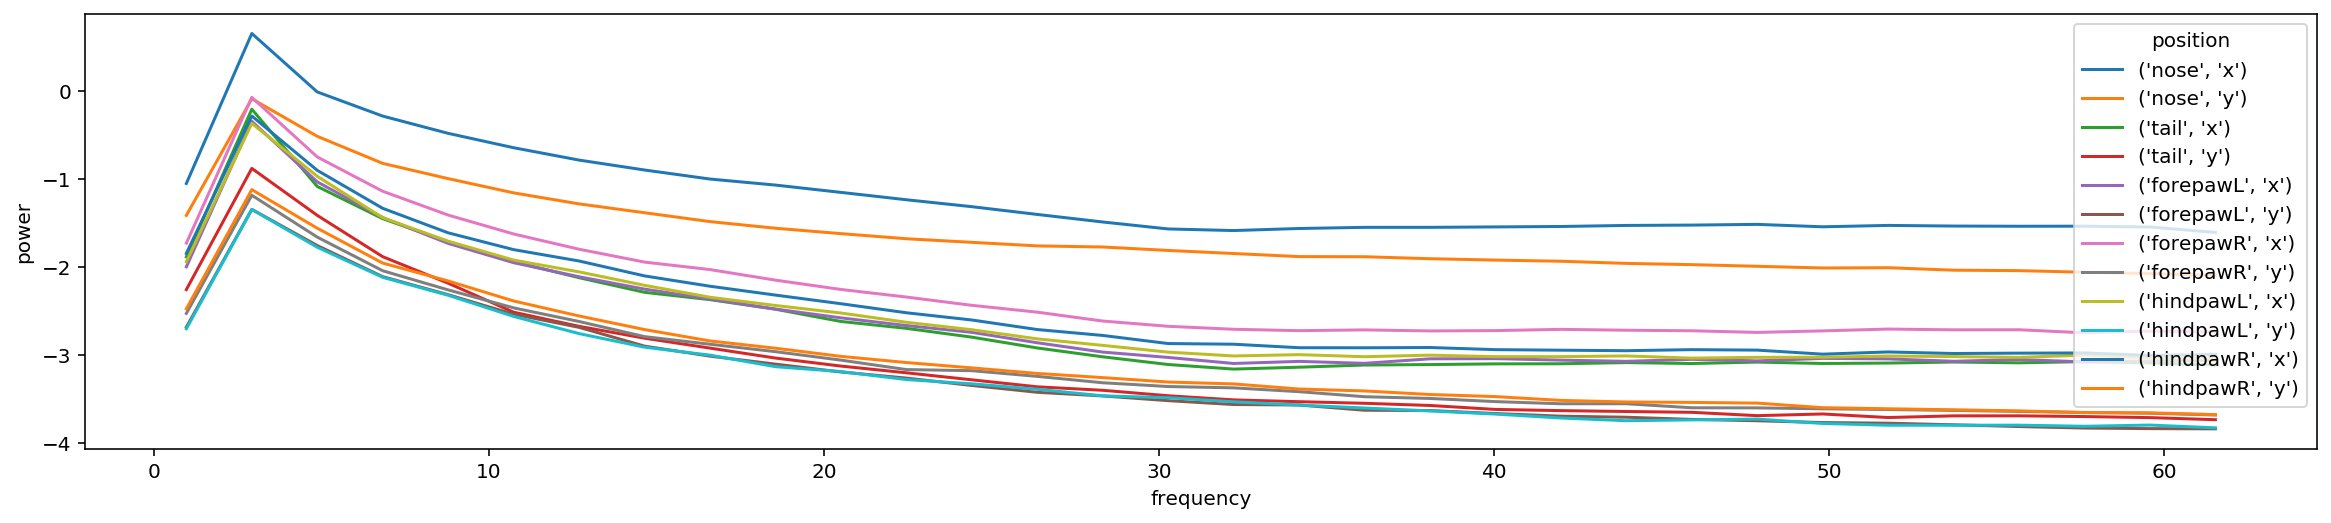

In [14]:
np.log10(power).power.mean('time').plot(x='frequency', hue='position', size=4, aspect=5);

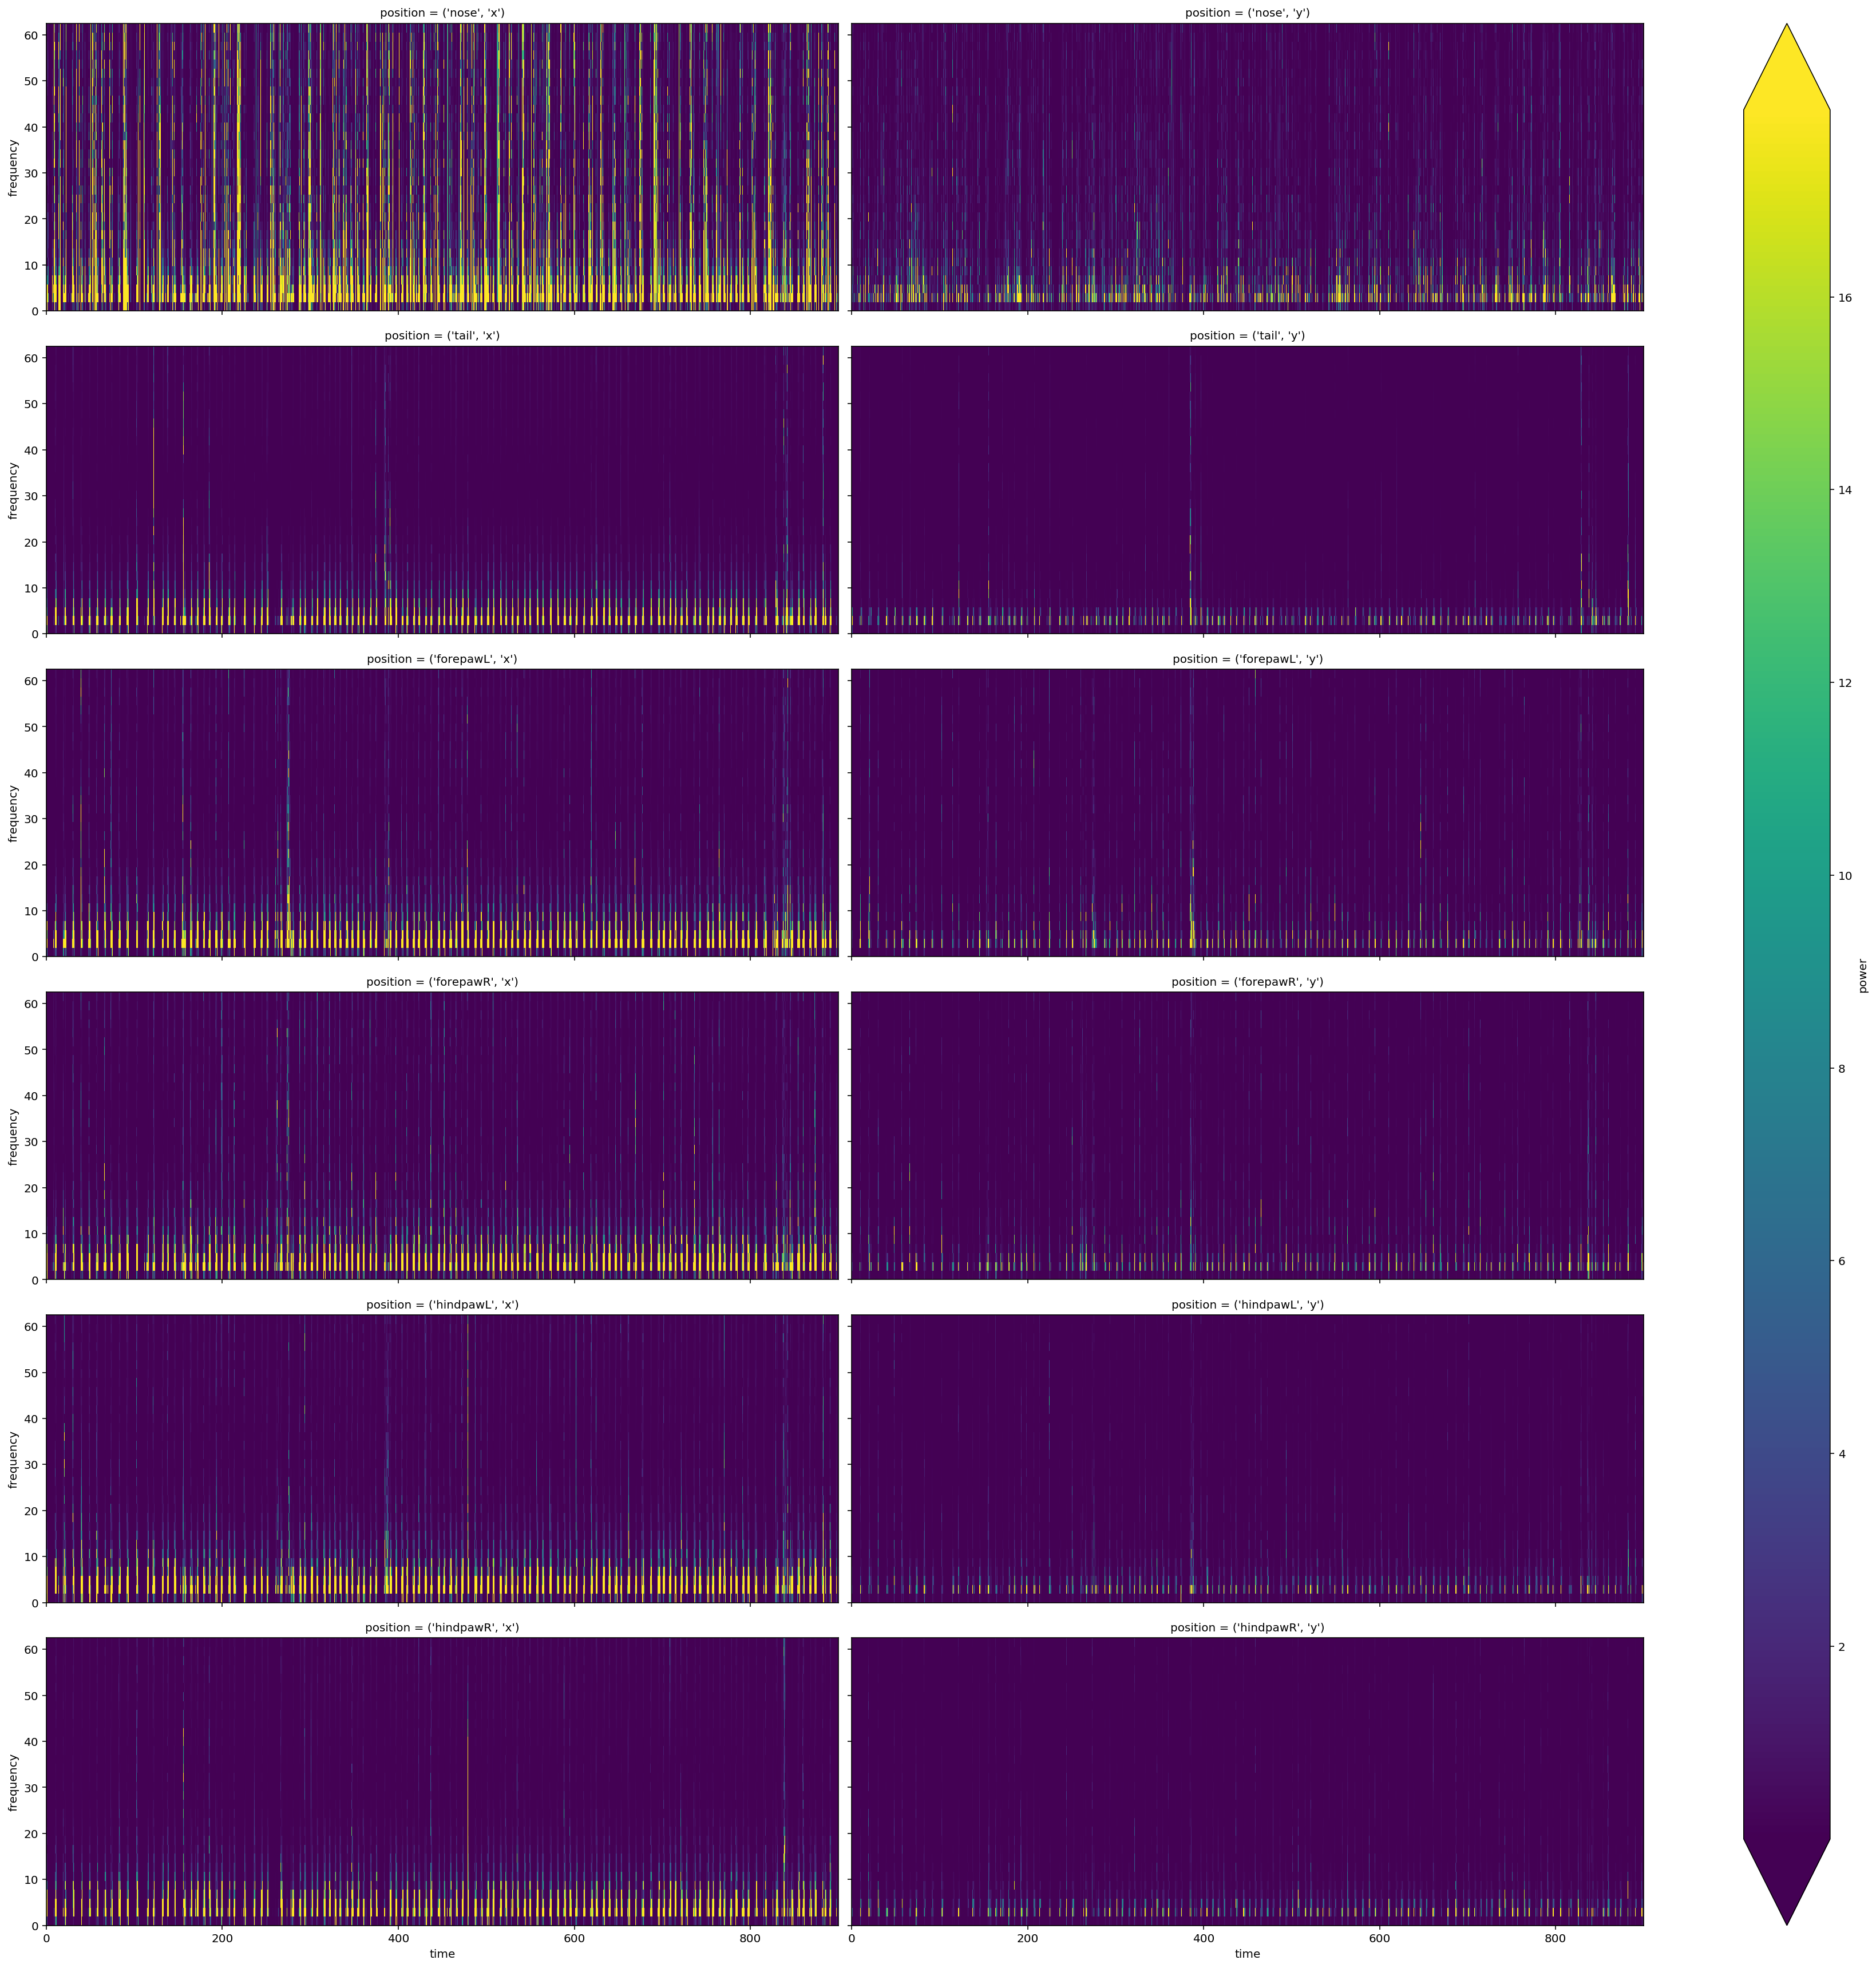

In [15]:
power.power.plot(x='time', y='frequency', robust=True, col='position', col_wrap=2, size=4, aspect=3)

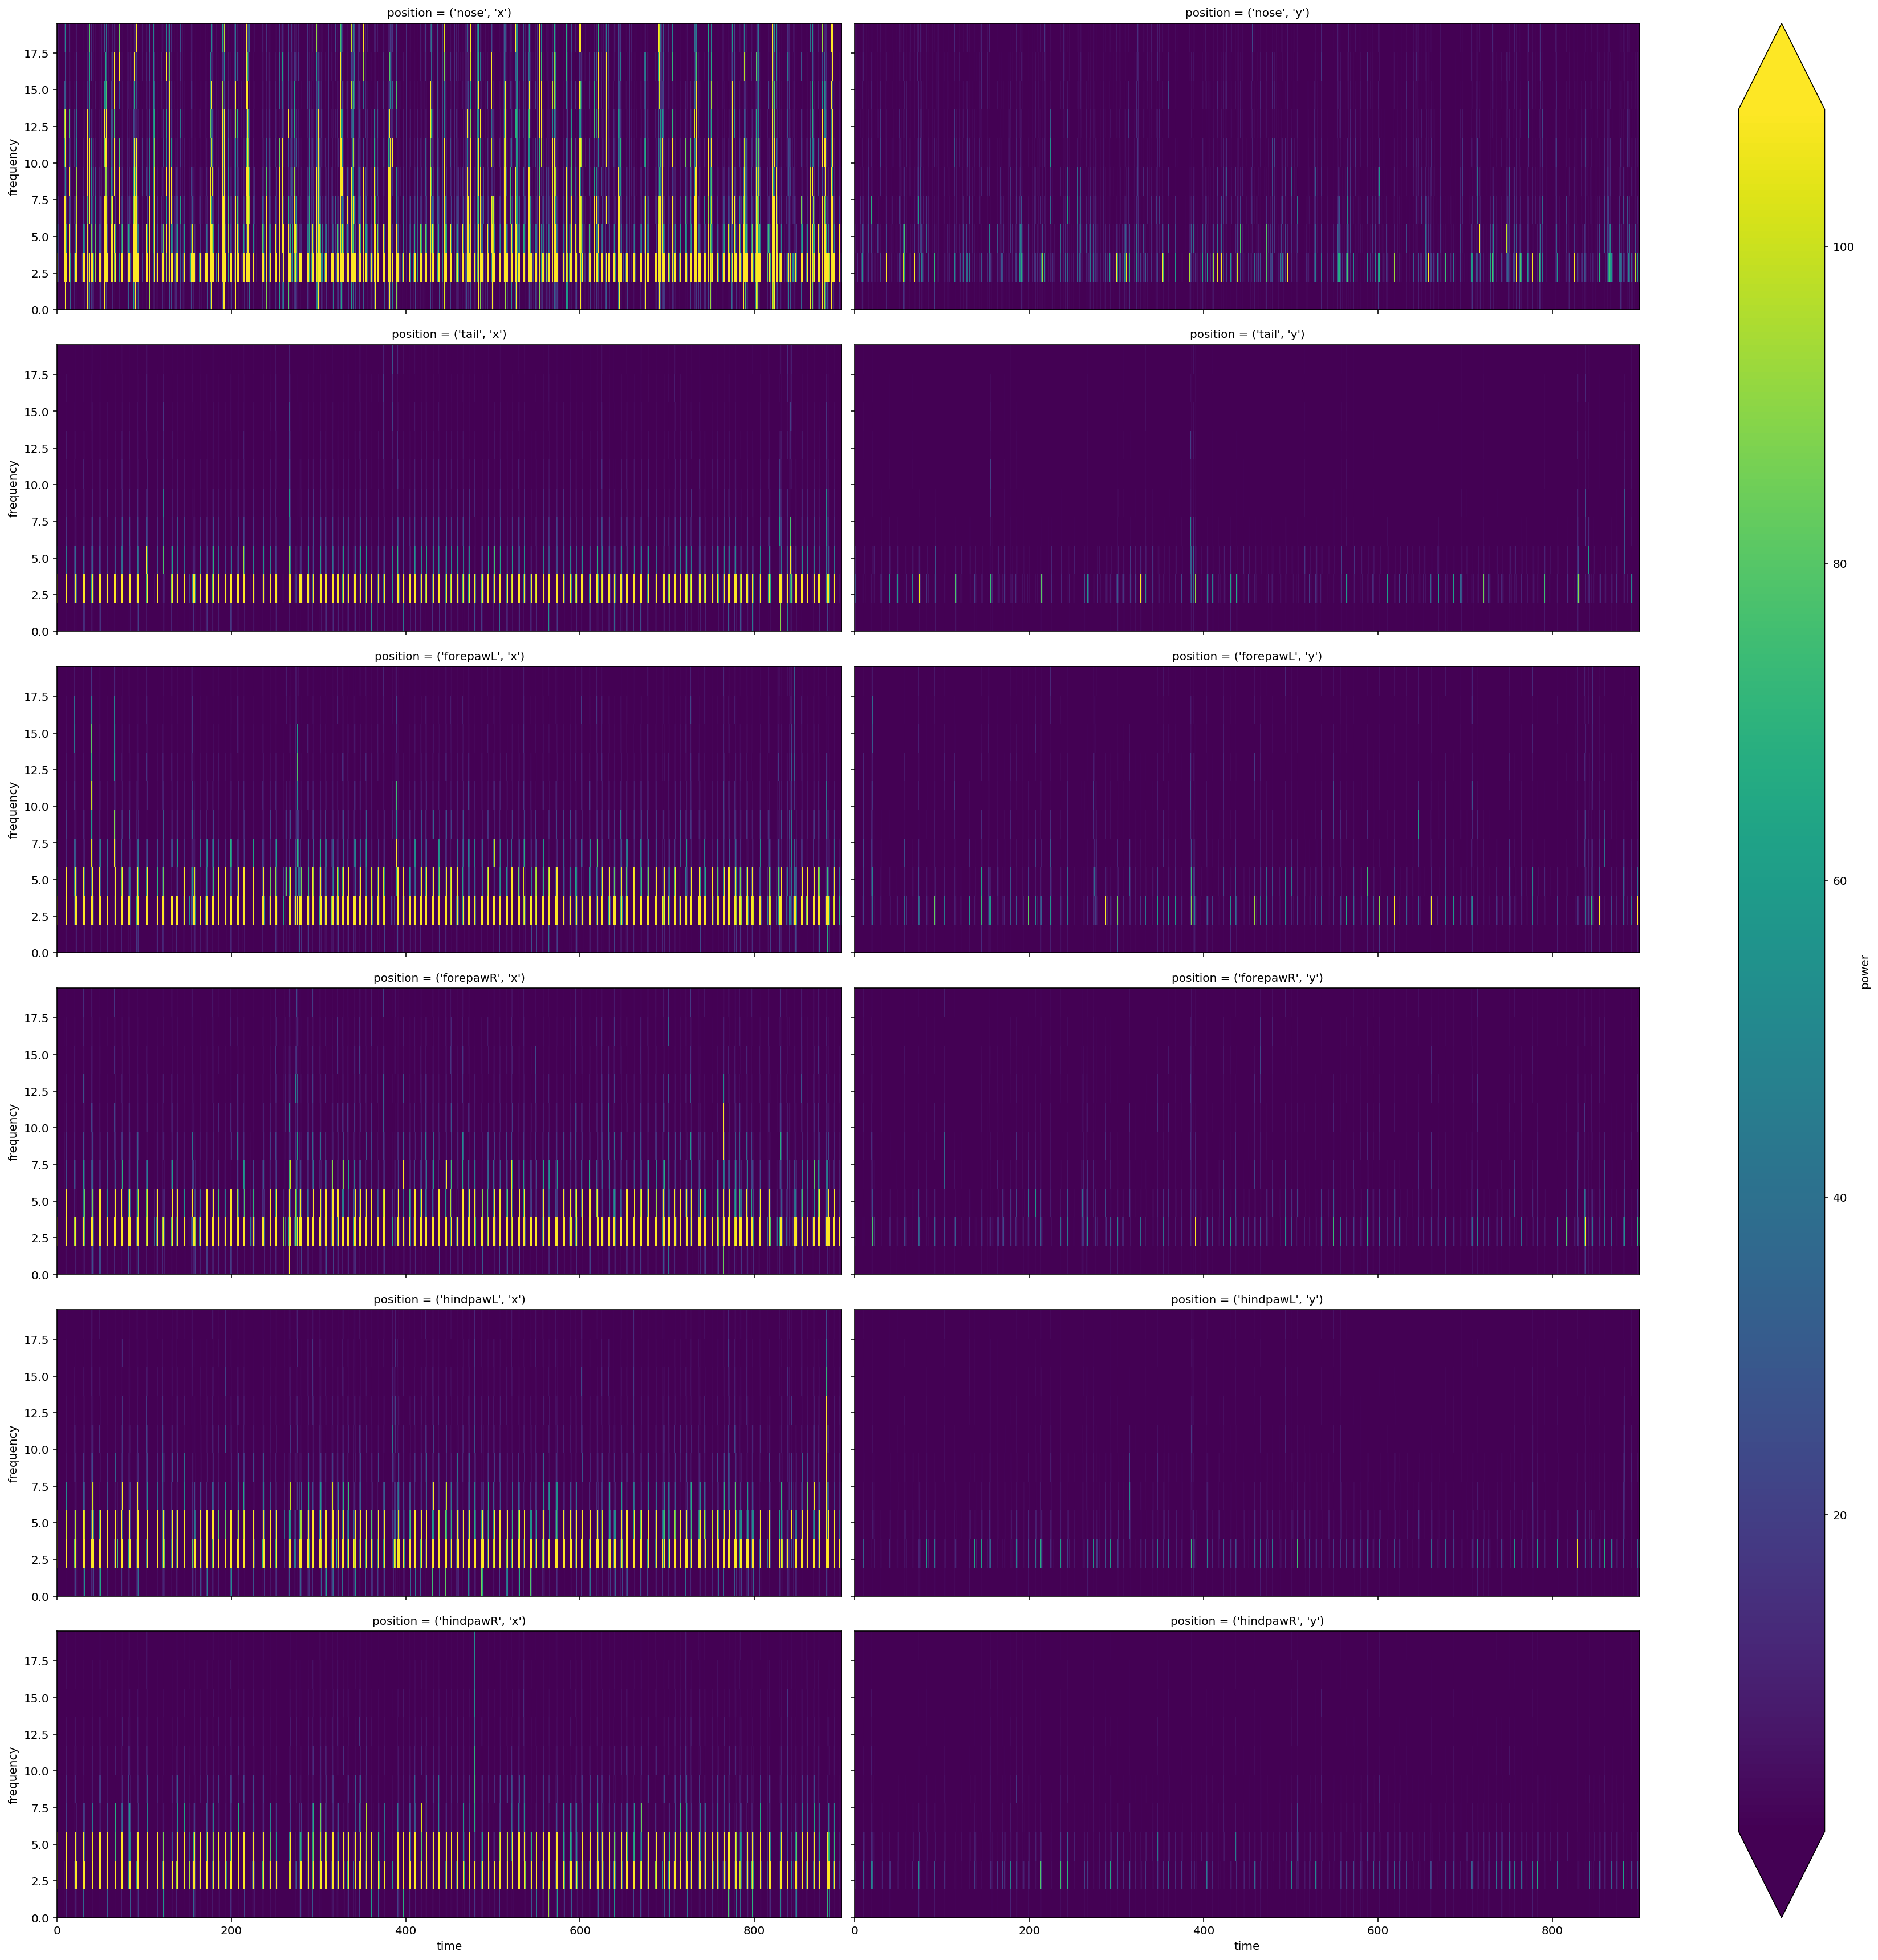

In [16]:
power.power.sel(frequency=slice(0, 20)).plot(x='time', y='frequency', robust=True, col='position', col_wrap=2, size=4, aspect=3)

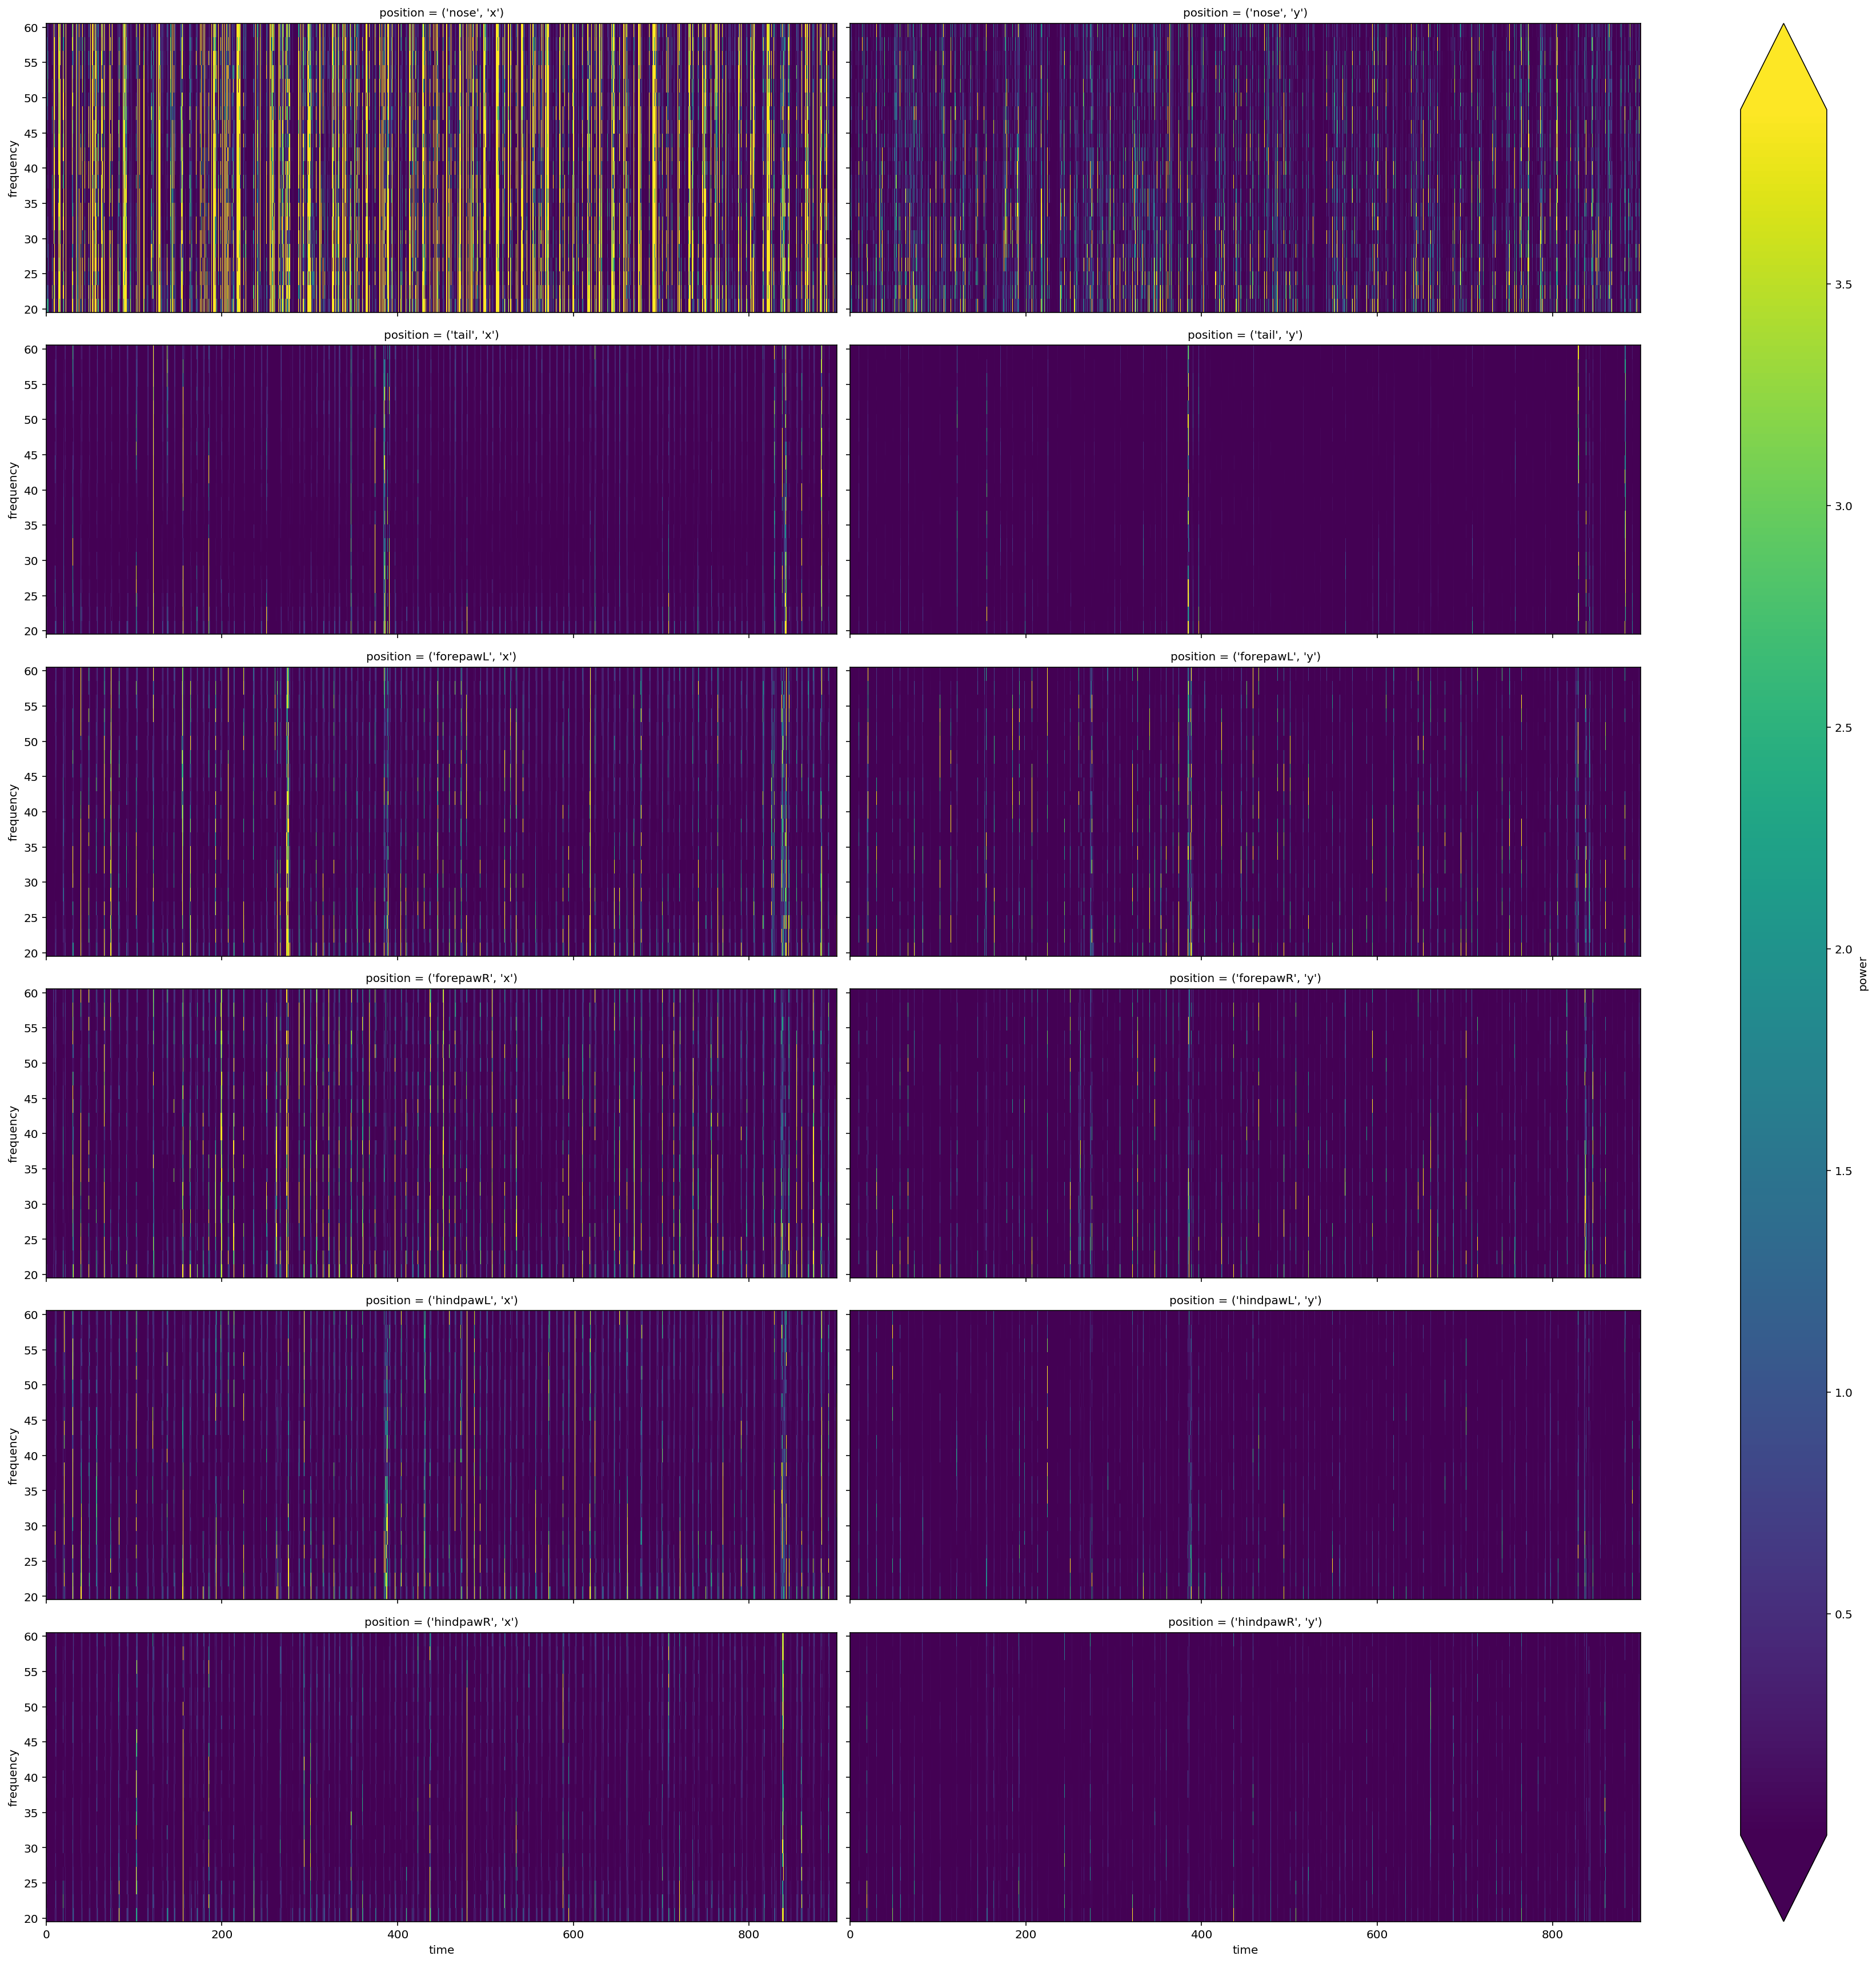

In [17]:
power.power.sel(frequency=slice(20, 60)).plot(x='time', y='frequency', robust=True, col='position', col_wrap=2, size=4, aspect=3)

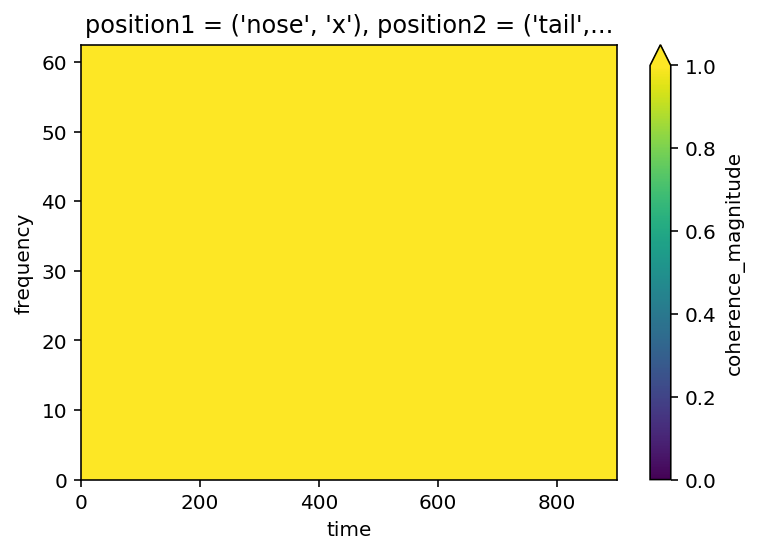

In [18]:
dimension_names = ['time', 'frequency', 'position1', 'position2']
data_vars = {
    'coherence_magnitude': (dimension_names, connectivity.coherence_magnitude())}
coordinates = {
    'time': connectivity.time + np.diff(connectivity.time)[0] / 2,
    'frequency': connectivity.frequencies + np.diff(connectivity.frequencies)[0] / 2,
    'position1': linear_track_position.columns,
    'position2': linear_track_position.columns,
}
coherence_magnitude = xr.Dataset(data_vars, coords=coordinates)
coherence_magnitude.sel(position1=('nose', 'x'), position2=('tail', 'x')).coherence_magnitude.plot(x='time', y='frequency', vmin=0, vmax=1)

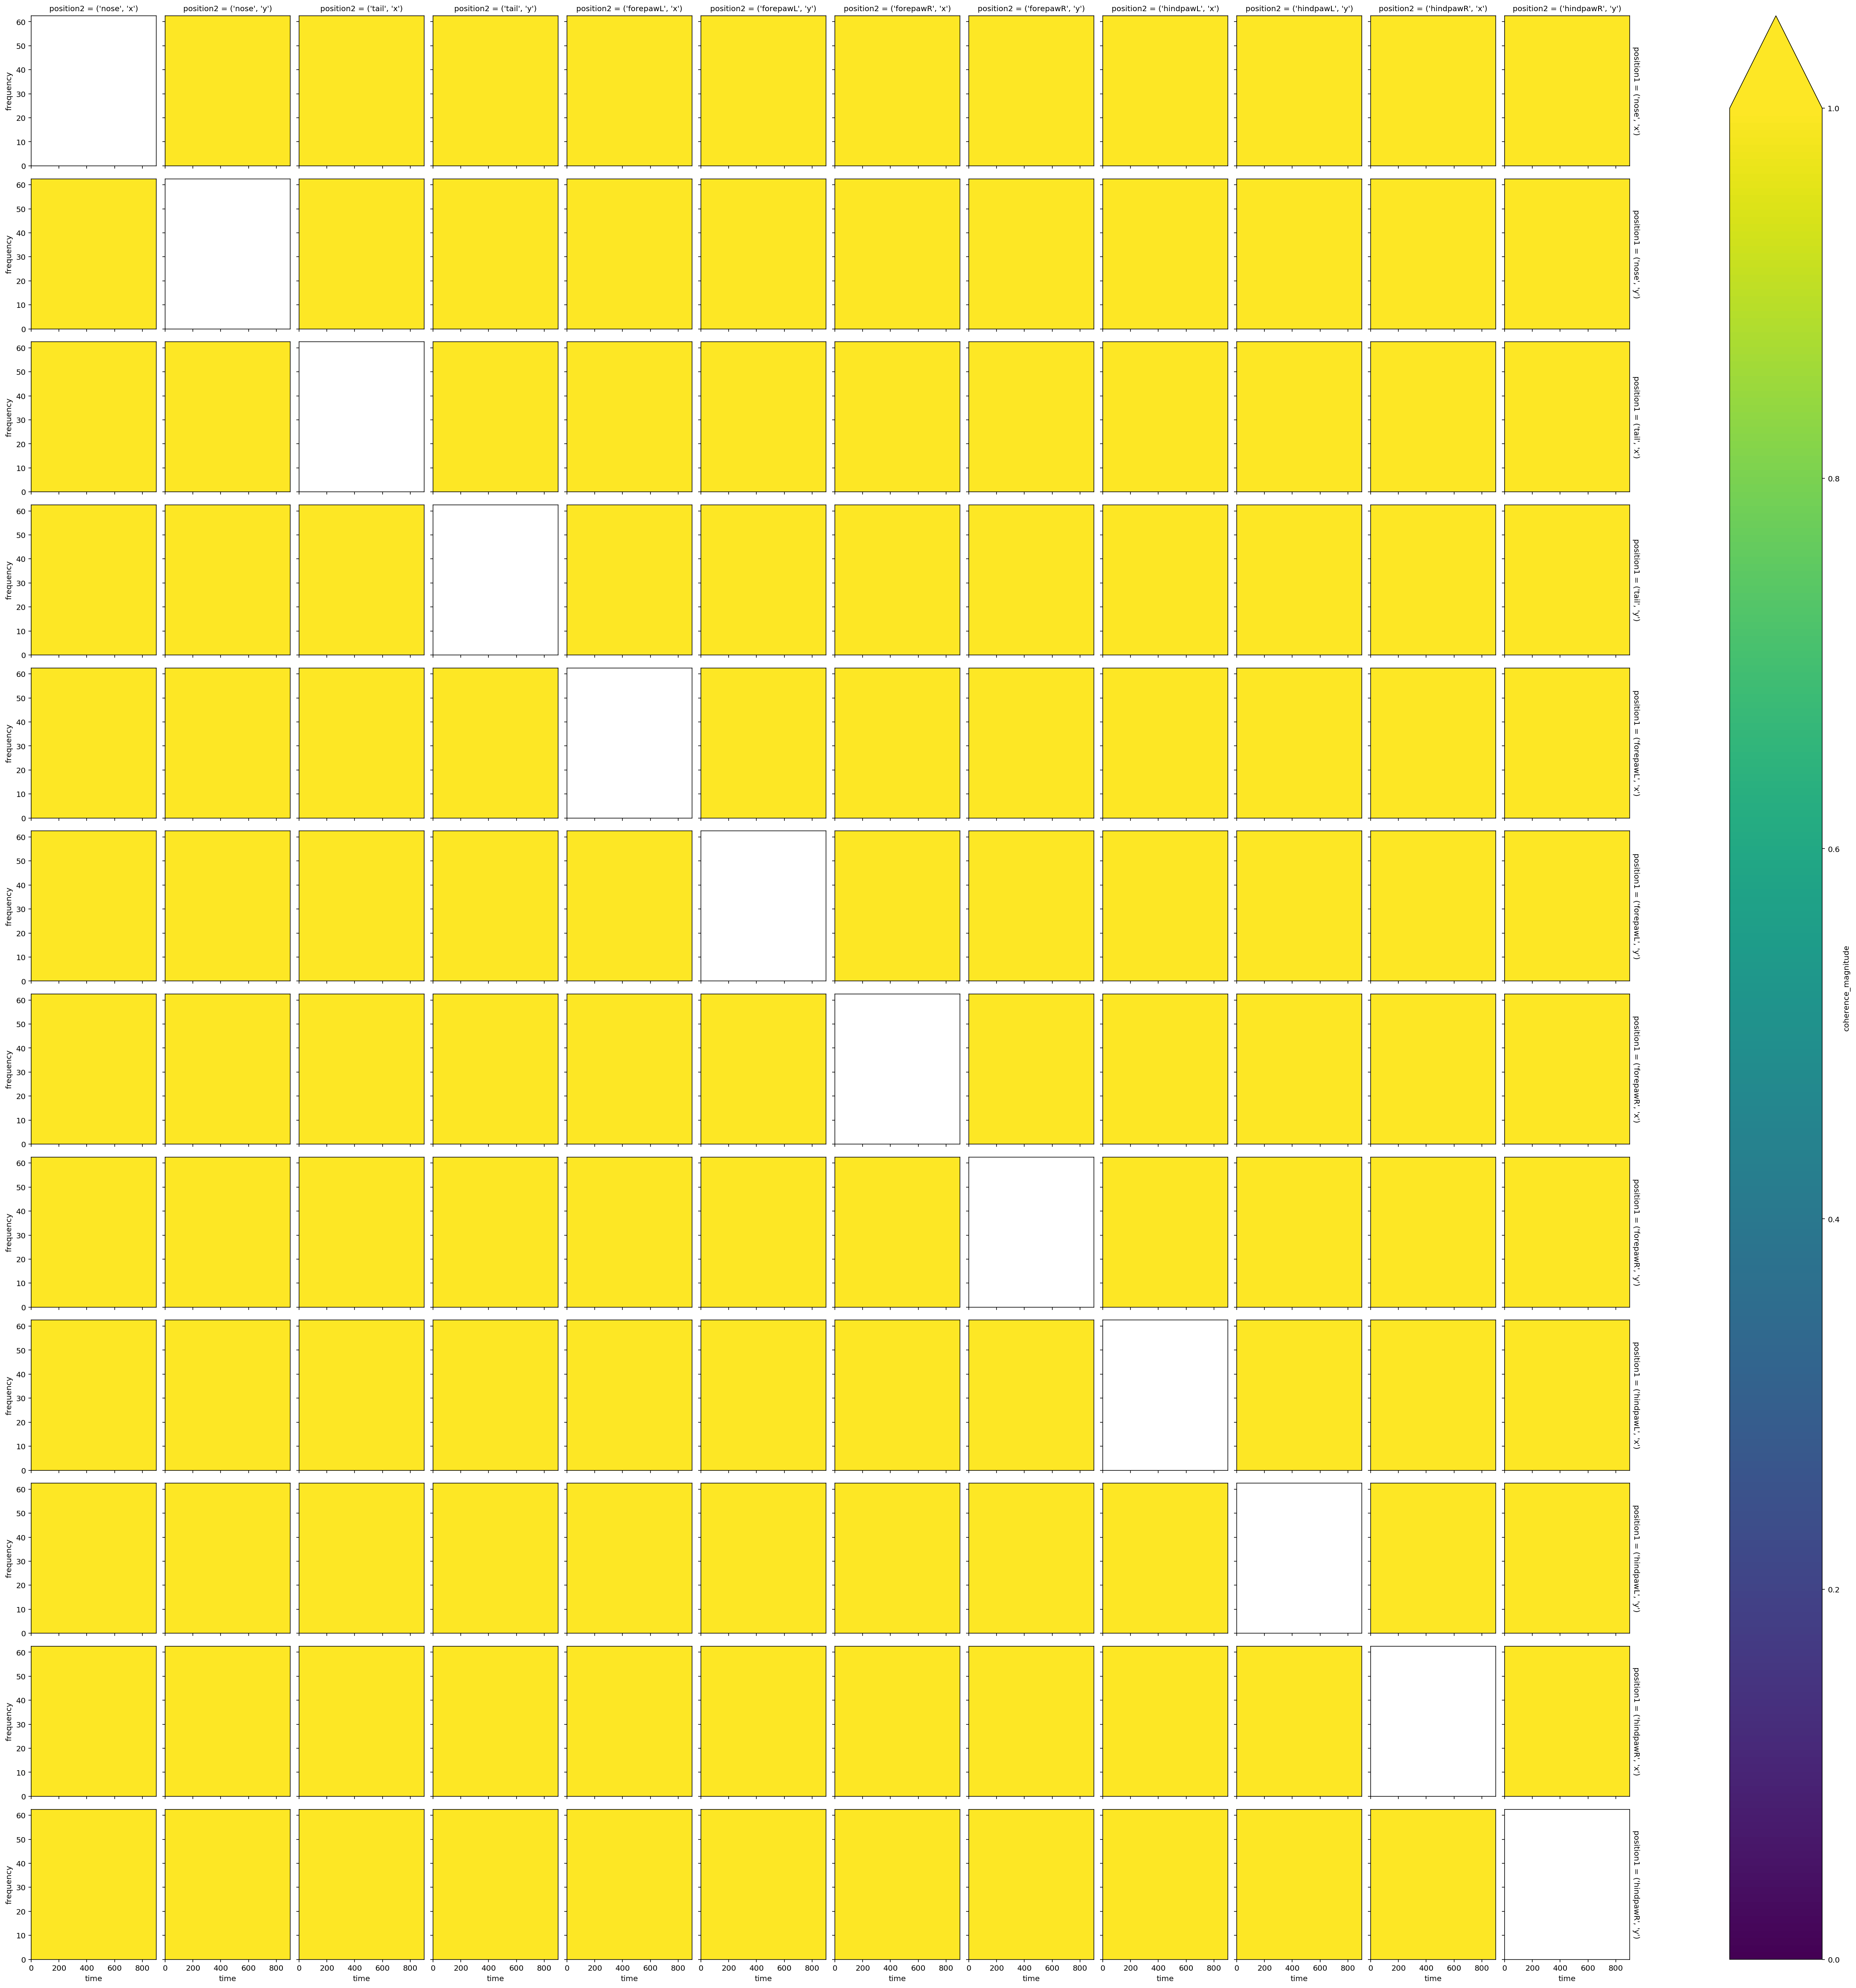

In [19]:
coherence_magnitude.coherence_magnitude.plot(x='time', y='frequency', row='position1', col='position2', vmin=0.0, vmax=1.0)

In [20]:
connectivity.group_delay(frequencies_of_interest=(0, 6), frequency_resolution=multitaper.frequency_resolution)

/Users/edeno/miniconda3/envs/pose_analysis/lib/python3.6/site-packages/spectral_connectivity/statistics.py:122: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / (degrees_of_freedom - 2)


(array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],
 
        ...,
 
        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan,